# ECI 273 Project

In [3]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import datasets
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import linear_model
from sklearn.metrics import r2_score


In [4]:
class LinearRegression:
    #constructor to initialize the coefficient array
    def __init__(self):
        self.b = []
        
    def fit(self,x,y,order):
        N = len(x)
        if order == 0:
            X = np.c_[np.ones(N)]
        elif order == 1:
            X = np.c_[np.ones(N),x]
        elif order == 2:
            X = np.c_[np.ones(N),x,np.square(x)]
        else:
            X = np.c_[np.ones(N),x,np.square(x),np.power(x,3)]
#         print(X)
        self.b = X.T@y@np.linalg.inv(X.T@X)
        


    def predict(self,x):
#         print(self.b)
        prediction = []
        for i in range(len(x)):
            pred = self.b[0]
            for j in range(1,len(self.b)):
                pred+=self.b[j]*np.power(x[i],j)
            prediction.append(pred)
        return prediction
    
    def mse(self,y,prediction):
        s = 0
        for i in range(len(y)):
            s+=(y[i]-prediction[i])**2
        score = s/len(y)
        return score

In [171]:
df = pd.read_csv('D:/UC DAVIS/ECI 273/project/data/clean_data.csv', delimiter=',')

In [172]:
df

,evaporation,inflow,elevation,storage,outflow,inflow_catego,outflow_catego
0,1.230449,3.382737,2.866925,13.829758,3.550840,drought,okay
1,1.113943,3.318481,2.866701,13.828818,3.585122,drought,okay
2,1.591065,3.204663,2.866465,13.827829,3.523616,drought,okay
3,1.361728,3.304706,2.866234,13.826863,3.570776,drought,okay
4,1.361728,3.281488,2.865986,13.825822,3.568554,drought,okay
...,...,...,...,...,...,...,...
1798,1.176091,3.480438,2.820851,13.633561,3.301030,okay,drought
1799,1.278754,3.546296,2.821160,13.634895,3.301030,okay,drought
1800,1.342423,3.566437,2.821507,13.636399,3.278754,okay,drought
1801,1.000000,3.413970,2.821664,13.637079,3.255273,drought,drought


## Multivariate Linear Regression

In [176]:
df = df.dropna()
df = df.reset_index(drop=True)
# df = df.rename(columns={"evap_cfs": "evaporation", "inflow_cfs": "inflow", "elevation_feet": "elevation","storage_ft": "storage","outflow_cfs": "outflow" })
df['outflow'].isnull().values.any()


False

In [185]:
from sklearn import linear_model

# x = df.iloc[:,:4].values
# x = df.drop(['EVAP CFS','inflow_cfs','elevation_feet','ppt_inches','storage_taf'],1)
# y = df["outflow_catego"].values


reg = linear_model.LinearRegression()
reg.fit(df[['evaporation','outflow','elevation','storage']],df.outflow)

LinearRegression()

In [186]:
#separate the other attributes from the predicting attribute
x = df[['evaporation','inflow','elevation','storage']]
#separte the predicting attribute into Y for model training 
y = df['outflow']

In [187]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [188]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [189]:
y_prediction =  LR.predict(x_test)
r2 = r2_score(y_test, y_prediction)

print(r2)

0.2851238656346473


In [182]:
## Plotting

In [183]:
len(time_new)

361

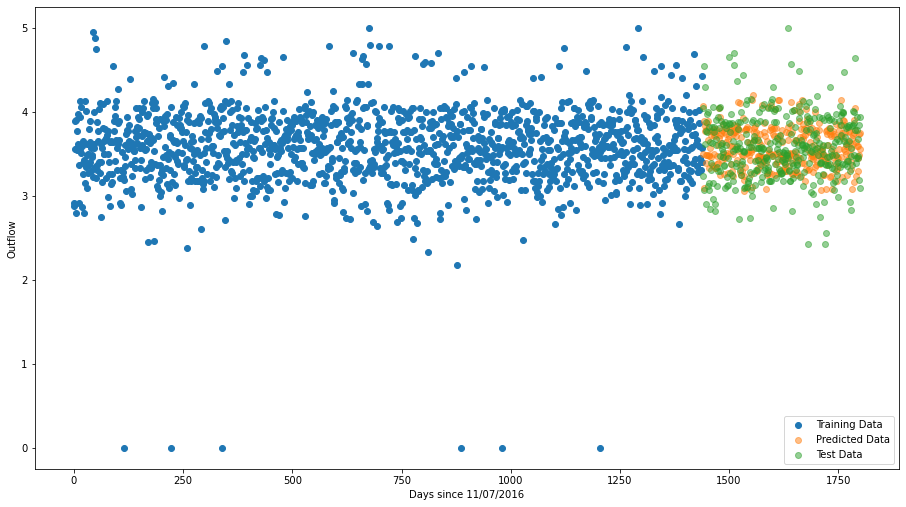

In [190]:
# first we get some dates

time_init = np.arange(0,len(y_train),1)
time_new = np.arange(len(time_init),len(df['outflow']),1)
fig = plt.figure()
fig.set_size_inches(15.5, 8.5)

ax1 = fig.add_subplot(111)

ax1.scatter(time_init, y_train, marker='o', label='Training Data')
ax1.scatter(time_new, y_prediction, marker='o',alpha = 0.5, label='Predicted Data')
ax1.scatter(time_new, y_test, marker='o',alpha = 0.5, label='Test Data')
# ax1.scatter(x[40:],y[40:], s=10, c='r', marker="o", label='second')
plt.legend(loc='lower right')
plt.xlabel('Days since 11/07/2016')
plt.ylabel('Outflow')
plt.show()


In [75]:
def multi_var(data_x,data_y):
    cols = ['evaporation','outflow','elevation','storage']
    data_y = df['inflow']
    for col in cols:
        data_x = df[['evaporation','inflow','elevation','storage']]
        data_x = x.drop(columns=[col])

        #separte the predicting attribute into Y for model training 
        x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state = 42)
        LR.fit(x_train,y_train)
        y_prediction =  LR.predict(x_test)
        r2 = r2_score(y_test, y_prediction)

        print('The r2 score without %s is %f,'% (col, r2))

In [76]:
multi_var(x,y)

The r2 score without evaporation is 0.279425,
The r2 score without outflow is 0.472007,
The r2 score without elevation is 0.393915,
The r2 score without storage is 0.398300,


In [118]:
def four_var(data_x,data_y):
    feats = ['evaporation','inflow','elevation','storage','outflow']
    for j in feats:
        # this is the factor u are testing for the score
        cols = ['evaporation','inflow','elevation','storage']
        data_y = df['outflow']
        for col in cols:
            data_x = df[['evaporation','inflow','elevation','storage']]
            data_x = data_x.drop(columns=[col])

            #separte the predicting attribute into Y for model training 
            x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state = 42)
            LR.fit(x_train,y_train)
            y_prediction =  LR.predict(x_test)
            r2 = r2_score(y_test, y_prediction)

            print('The r2 score without %s is %f,'% (col, r2))

## Try and improve the R2 score

In [201]:
#separate the other attributes from the predicting attribute
x = df[['evaporation','outflow','elevation','storage']]
#separte the predicting attribute into Y for model training 
y = df['inflow']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [202]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             x_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [203]:
from sklearn.linear_model import LinearRegression
# Train model
lr = LinearRegression().fit(x_train, y_train)
# get cross val scores
get_cv_scores(lr)

CV Mean:  0.4867421613429125
STD:  0.016152381691440638




In [204]:
from sklearn.linear_model import Ridge
# Train model with default alpha=1
ridge = Ridge(alpha=1).fit(x_train, y_train)
# get cross val scores
get_cv_scores(ridge)

CV Mean:  0.4365337510430492
STD:  0.032540021623699164




In [205]:

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Score:  0.4543377497114921
Best Params:  {'alpha': 0.001}


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.3s finished


In [207]:
from sklearn.linear_model import Lasso
# Train model with default alpha=1
lasso = Lasso(alpha=1).fit(x_train, y_train)
# get cross val scores
get_cv_scores(lasso)

CV Mean:  -0.008946893765071007
STD:  0.012130025873079275




In [208]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.4366012612563307
Best Params:  {'alpha': 0.001}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.0s finished


In [199]:
# match column names to coefficients
for coef, col in enumerate(x_train.columns):
    print(f'{col}:  {lasso.coef_[coef]}')

evaporation:  0.0
inflow:  0.0
elevation:  0.0
storage:  0.0


In [200]:
from sklearn.linear_model import ElasticNet
# Train model with default alpha=1 and l1_ratio=0.5
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5).fit(x_train, y_train)
# get cross val scores
get_cv_scores(elastic_net)

CV Mean:  -0.006886752356987191
STD:  0.00494908188631456




In [134]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s


Best Score:  0.4366012612563307
Best Params:  {'alpha': 0.001, 'l1_ratio': 1}


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    0.5s finished


# Log Reg

In [210]:
df

,evaporation,inflow,elevation,storage,outflow,inflow_catego,outflow_catego
0,1.230449,3.382737,2.866925,13.829758,3.550840,drought,okay
1,1.113943,3.318481,2.866701,13.828818,3.585122,drought,okay
2,1.591065,3.204663,2.866465,13.827829,3.523616,drought,okay
3,1.361728,3.304706,2.866234,13.826863,3.570776,drought,okay
4,1.361728,3.281488,2.865986,13.825822,3.568554,drought,okay
...,...,...,...,...,...,...,...
1796,1.176091,3.480438,2.820851,13.633561,3.301030,okay,drought
1797,1.278754,3.546296,2.821160,13.634895,3.301030,okay,drought
1798,1.342423,3.566437,2.821507,13.636399,3.278754,okay,drought
1799,1.000000,3.413970,2.821664,13.637079,3.255273,drought,drought


In [209]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split


y = df['outflow_catego']
x = df.drop(['outflow_catego'],1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
classifier = LogisticRegression()

def make_model(feature):
    classifier.fit(np.array(x_train[feature]).reshape(-1,1),y_train)
    mpg_pred = classifier.predict(np.array(x_test[feature]).reshape(-1,1))
    print(feature,"Precision:",precision_score(y_test,mpg_pred,average='macro',zero_division=0))
    print(feature,"Recall:",recall_score(y_test,mpg_pred,average='macro',zero_division=0))

## Testing out a ton of other models

In [212]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import random
from sklearn import tree


from sklearn import linear_model
logr = linear_model.LogisticRegression(n_jobs =-1,solver = 'lbfgs', max_iter=500)

In [214]:
df

,evaporation,inflow,elevation,storage,outflow,inflow_catego,outflow_catego
0,1.230449,3.382737,2.866925,13.829758,3.550840,drought,okay
1,1.113943,3.318481,2.866701,13.828818,3.585122,drought,okay
2,1.591065,3.204663,2.866465,13.827829,3.523616,drought,okay
3,1.361728,3.304706,2.866234,13.826863,3.570776,drought,okay
4,1.361728,3.281488,2.865986,13.825822,3.568554,drought,okay
...,...,...,...,...,...,...,...
1796,1.176091,3.480438,2.820851,13.633561,3.301030,okay,drought
1797,1.278754,3.546296,2.821160,13.634895,3.301030,okay,drought
1798,1.342423,3.566437,2.821507,13.636399,3.278754,okay,drought
1799,1.000000,3.413970,2.821664,13.637079,3.255273,drought,drought


In [213]:
import random

random.seed(10)
svm = SVC(gamma='auto')
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)
y_true = y_test.values.tolist()

rec_svm = recall_score(y_true, y_pred, average='macro')


prec_svm = precision_score(y_true, y_pred, average='macro', zero_division = 0)
print ("The recall score of this model is: ", rec_svm)
print ("The precision score of this model is: ", prec_svm)
print ("The cross val score of this model is: ", cross_val_score(svm, X, y, cv = 10, scoring = 'accuracy').mean())


ValueError: could not convert string to float: 'drought'

In [33]:
logr = LogisticRegression(solver='liblinear',multi_class='ovr')
logr.fit(X_train, y_train)

y_pred = logr.predict(X_test)
y_true = y_test.values.tolist()

rec_svm = recall_score(y_true, y_pred, average='macro')

prec_svm = precision_score(y_true, y_pred, average='macro', zero_division = 0)

print ("The recall score of this model is: ", rec_svm)
print ("The precision score of this model is: ", prec_svm)
print ("The cross val score of this model is: ", cross_val_score(logr, X, y, cv = 10, scoring = 'accuracy').mean())

,evap_cfs,inflow_cfs,elevation_feet,ppt_inches,storage_taf,outflow_cfs,outflow_catego
0,17.0,2414.0,736.08,0.00,1551207.0,3555.0,light
1,13.0,2082.0,735.70,0.00,1547855.0,3847.0,light
2,39.0,1602.0,735.30,0.00,1544332.0,3339.0,light
3,23.0,2017.0,734.91,0.00,1540902.0,3722.0,light
4,23.0,1912.0,734.49,0.00,1537215.0,3703.0,light
...,...,...,...,...,...,...,...
1798,15.0,3023.0,661.99,0.05,987355.0,2000.0,light
1799,19.0,3518.0,662.46,1.13,990393.0,2000.0,light
1800,22.0,3685.0,662.99,0.00,993827.0,1900.0,light
1801,10.0,2594.0,663.23,0.07,995384.0,1800.0,light


In [32]:
#model for mpg
make_model('inflow_cfs')
make_model('evap_cfs')
make_model('elevation_feet')
make_model('ppt_inches')
make_model('storage_taf')
make_model('outflow_cfs')


inflow_cfs Precision: 0.4345311854605535
inflow_cfs Recall: 0.35428329092451233
evap_cfs Precision: 0.3228589032655576
evap_cfs Recall: 0.3333333333333333
elevation_feet Precision: 0.3228589032655576
elevation_feet Recall: 0.3333333333333333
ppt_inches Precision: 0.3228589032655576
ppt_inches Recall: 0.3333333333333333
storage_taf Precision: 0.3228589032655576
storage_taf Recall: 0.3333333333333333
outflow_cfs Precision: 0.6274509803921569
outflow_cfs Recall: 0.6666666666666666
